In [1]:
import xlwt                                   #Reading input from an .xls file                            #Reading input from an .xls file
import matplotlib.pyplot as plt               #For plotting curves
#from matplotlib.widgets import Slider         #For implementing Threshold Slider

from ipywidgets import widgets
from ipywidgets.widgets import interact

from IPython.display import display

import numpy as np                            #For Interpolation Techniques of Curve Fitting
from scipy.interpolate import interp1d        #Interpolation techniques 

In [2]:
%gui qt

In [3]:
%matplotlib inline

In [4]:
from Algo1.read_input import read_Input
from Algo1.construct_list import construct_Alphalist, construct_Betalist
from Algo1.smoothing_plot import smoothing_Plot

### Global variables

In [5]:
x_coordinates = []                            #Wavelength (angs) values
y_coordinates = []                            #(Raw - OB)/OB values
alpha_list = []                               #Normalized Absolute Differences Sum 
beta_list = []                                #Sum of Absolute Differences of adjacent elements of each alpha_list element 
total_Span = 0                                #Total window width or length: 2*window_Span 
outputfile = "/Users/j35/Desktop/output.xls"                     #Name of output file name

### User inputs

In [6]:
window_span = 0.025
threshold   = 0.0025

### Main code 

In [7]:
xy_coordinates = read_Input(x_coordinates, y_coordinates)
x_coordinates = xy_coordinates['x']
y_coordinates = xy_coordinates['y']

alpha_list = construct_Alphalist(window_span, x_coordinates, y_coordinates, alpha_list)
beta_list = construct_Betalist(alpha_list, beta_list)

result = smoothing_Plot(2 * window_span, threshold, x_coordinates, y_coordinates, beta_list)
x_smooth1 = result['x_smooth1']
x_smooth2 = result['x_smooth2']
smooth_y_coordinates = result['smooth_y_coordinates']

### Plot #1

In [8]:
"""Method for curve fitting the somoothed curve"""

def all_plots(threshold):
    
    result = smoothing_Plot(2 * window_span, threshold, x_coordinates, y_coordinates, beta_list)
    x_smooth1 = result['x_smooth1']
    x_smooth2 = result['x_smooth2']
    smooth_y_coordinates = result['smooth_y_coordinates']
    
    smooth_x_npy = np.asarray(x_coordinates)
    smooth_y_npy = np.asarray(smooth_y_coordinates)

    f = interp1d(smooth_x_npy, smooth_y_npy, kind = "cubic" )
    temp = f(x_coordinates)

    fig, ax = plt.subplots(4, figsize=(15, 15))
    fig.suptitle("Neutron Imaging Curve Smoothing", fontsize="x-large")

    ax[0] = plt.subplot2grid((6,7), (0,0), rowspan=2, colspan=3)
    ax[0].plot(x_coordinates, y_coordinates)
    ax[0].set_title('Original Plot', fontsize=15)

    ax[1] = plt.subplot2grid((6,7), (3,0), rowspan=2, colspan=3)
    ax[1].plot(x_coordinates, beta_list, 'r.-')
    ax[1].axhline(y=threshold, linewidth=1, color='k')
    ax[1].set_title('Peak Plot', fontsize=15)

    ax[2] = plt.subplot2grid((6,7), (0,4), rowspan=2, colspan=3)
    ax[2].plot(x_coordinates, smooth_y_coordinates)
    ax[2].set_title('Smoothed graph', fontsize=15)

    ax[3] = plt.subplot2grid((6,7), (3,4), rowspan=2, colspan=3)
    ax[3].plot(x_coordinates, f(x_coordinates))
    ax[3].set_title('Interpolated', fontsize=15)

    fig.show()


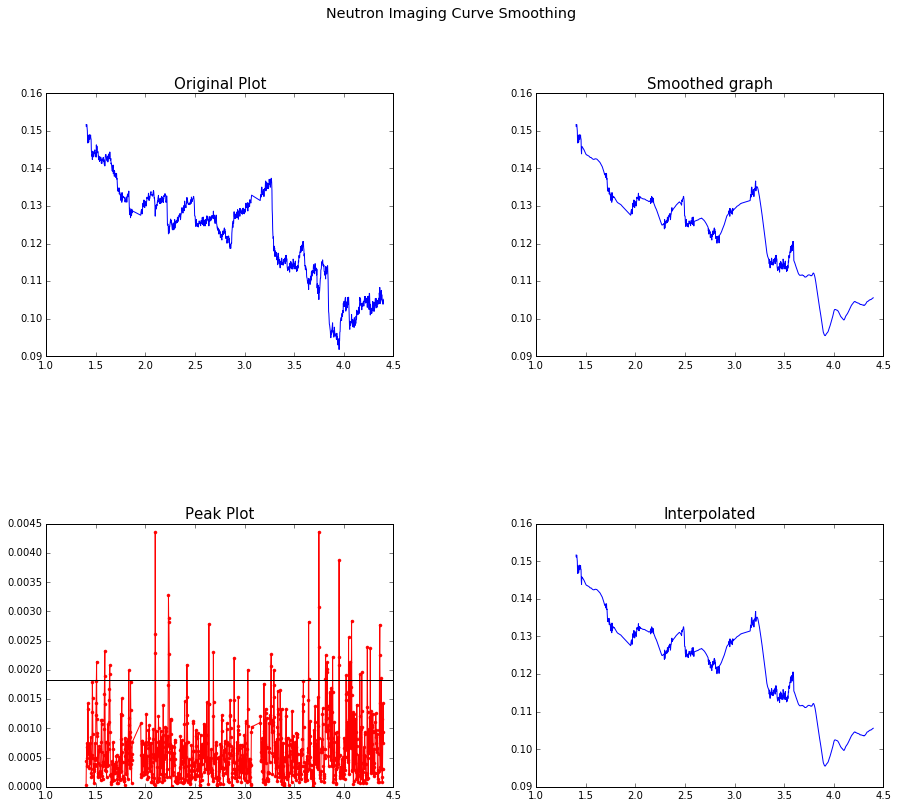

In [9]:
step1 = interact(all_plots, threshold = widgets.FloatSlider( min = 0.000, 
                                                            max = 0.005, 
                                                            step = 0.00001, 
                                                            value = 0.000,
                                                           description = 'Threshold'))

### output results 

In [10]:
threshold = step1.widget.result
result = smoothing_Plot(2 * window_span, threshold, x_coordinates, y_coordinates, beta_list)
smooth_y_coordinates = result['smooth_y_coordinates']

smooth_x_npy = np.asarray(x_coordinates)
smooth_y_npy = np.asarray(smooth_y_coordinates)

f = interp1d(smooth_x_npy, smooth_y_npy, kind = "cubic" )
temp = f(x_coordinates)

workbook = xlwt.Workbook(encoding='ascii') 
sheet = workbook.add_sheet("Sheet") 
sheet.write(0, 0, "(Raw-OB)/OB")    
sheet.write(0, 1, "wavelength (angs)")
for i in range(len(x_coordinates)):
    sheet.write(i+1, 0, x_coordinates[i])        
    sheet.write(i+1, 1, temp[i])    
workbook.save(outputfile)

### Plot #2

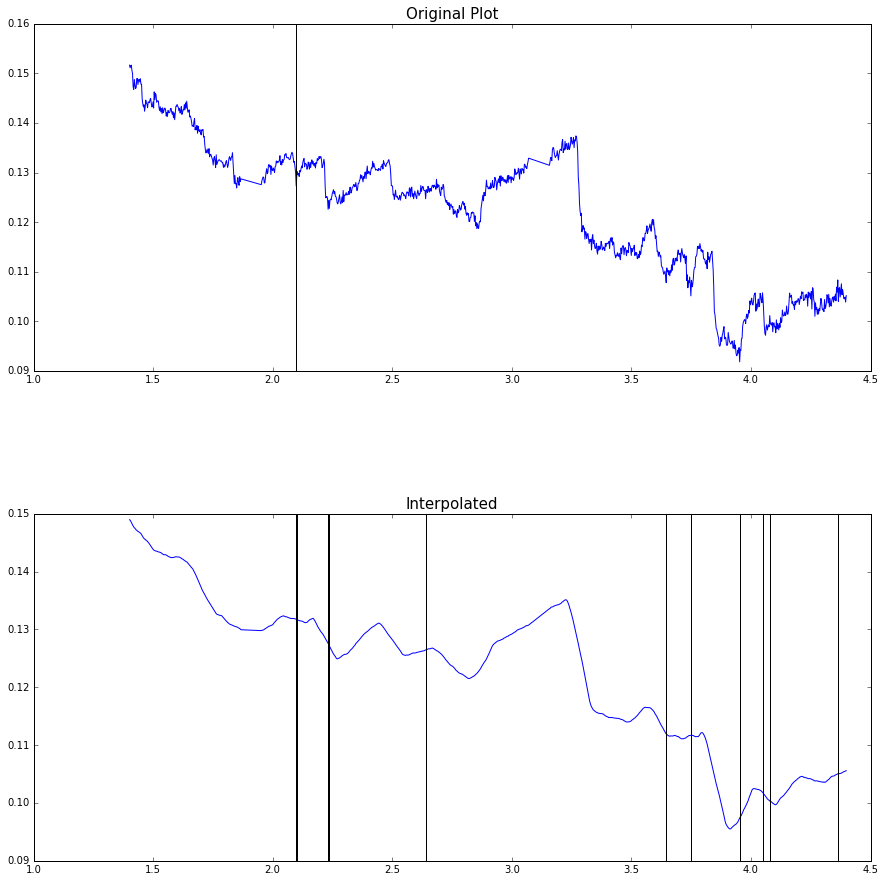

In [12]:
fig2, ax2 = plt.subplots(2, figsize=(15, 15))

ax2[0] = plt.subplot2grid((7,2), (0,0), rowspan=3, colspan=2)
ax2[0].plot(x_coordinates, y_coordinates)
ax2[0].set_title('Original Plot', fontsize=15)

for i in x_smooth1:
    plt.axvline(x = i, linewidth=1, color='k')    

    ax2[1] = plt.subplot2grid((7,2), (4,0), rowspan=3, colspan=2)
ax2[1].plot(x_coordinates, f(x_coordinates))
ax2[1].set_title('Interpolated', fontsize=15)
for i in x_smooth1:
    plt.axvline(x = i, linewidth=1, color='k')

fig2.show()